In [1]:
import torch
import math
from Project2_tools import *
import matplotlib.pyplot as plt
torch.set_grad_enabled(False)
import Project2_tools

In [2]:
train, train_target = generate_set(1000)
test, test_target = generate_set(1000)

In [3]:
print(train)

tensor([[0.1912, 0.5629],
        [0.7919, 0.8296],
        [0.1536, 0.5086],
        ...,
        [0.3385, 0.9000],
        [0.8402, 0.9854],
        [0.8601, 0.5913]])


In [4]:
#print(train_target)

In [5]:
#better results with normalisation
mean = train.mean()
std = train.std()
train = (train-mean)/std
test = (test-mean)/std



In [6]:
lr_reduction = 0
mseLoss = Project2_tools.MSE()
weight_bias = 0.5
epoch = 50
batch_size = 1
rounds = 10



In [7]:
def compute_error(result,target):
    nb_errors = 0
    for i in range(0, result.size(0)):
        output = model.forward(result[i])
        if ((output < 0 and target[i] == 1) or (output >= 0 and target[i] == -1)):
            nb_errors += 1 
    return nb_errors

In [8]:

lr = 0.005 # learning rate
train_results = []
test_results = []
for i in range(rounds):   
    print("round:",i)
    model = Project2_tools.Sequential(Project2_tools.Linear(2,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,1,weight_bias), Project2_tools.Tanh())

    for j in range(epoch):
        if lr_reduction and j%10 == 0:
            lr = lr*0.85
        loss = []
        for k in range(int(train.size(0)/batch_size)):
            for l in range(0, batch_size):
                output = model.forward(train[l+k*batch_size]) 
                loss.append(mseLoss.forward(output, train_target[l+k*batch_size])) 
                mseLoss_var = mseLoss.backward() 
                model.backward(mseLoss_var) 

            model.Stock_Grad_Descent(lr) 
            model.zero_grad() 
        loss_mean = torch.mean(torch.tensor(loss)) 


    errors_train = compute_error(train,train_target)
    errors_test = compute_error(test,test_target)
    
    
    print("Train Error : ",errors_train/train.size(0)*100,"%")
    print("Test Error : ",errors_test/test.size(0)*100,"%")
    print("")
    train_results.append(errors_train/train.size(0)*100)
    test_results.append(errors_test/test.size(0)*100)
    



round: 0


C:\Users\JAN\Desktop\master 2\deep learning\deeplearning_project\Deep_learning_project\project2\Project2_tools.py:90: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2985.)
  return self.W_x.mv(input.T)+self.b


Train Error :  1.6 %
Test Error :  2.1999999999999997 %

round: 1
Train Error :  2.4 %
Test Error :  1.7999999999999998 %

round: 2
Train Error :  2.9000000000000004 %
Test Error :  3.4000000000000004 %

round: 3
Train Error :  2.8000000000000003 %
Test Error :  2.6 %

round: 4
Train Error :  2.1 %
Test Error :  2.1 %

round: 5
Train Error :  2.7 %
Test Error :  2.8000000000000003 %

round: 6
Train Error :  2.0 %
Test Error :  1.9 %

round: 7
Train Error :  1.5 %
Test Error :  1.7000000000000002 %

round: 8
Train Error :  3.5999999999999996 %
Test Error :  3.6999999999999997 %

round: 9
Train Error :  2.5 %
Test Error :  2.9000000000000004 %



In [9]:
train_mean =  sum(train_results)/len(train_results)
test_mean = sum(test_results)/len(test_results)

print("train mean:",train_mean)
print("test mean :",test_mean)

train mean: 2.41
test mean : 2.5100000000000002


In [10]:
train_results.sort()
test_results.sort()

print("train smalest:",train_results[0])
print("test smalest :",test_results[0])

train smalest: 1.5
test smalest : 1.7000000000000002


In [11]:


print("train big:",train_results[9])
print("test big :",test_results[9])

train big: 3.5999999999999996
test big : 3.6999999999999997


In [12]:
import numpy as np

train_results = np.asarray(train_results)
test_results = np.asarray(test_results)

print("train std:",train_results.std())
print("test std :",test_results.std())

train std: 0.6040695324215581
test std : 0.6518435395092905


In [14]:
lr = 0.005 # learning rate

list_epoch_train = []
list_epoch_test = []
for e in range(50):
    train_results = []
    test_results = []
    print("epoch:",e)
    for i in range(10):   
        
        model = Project2_tools.Sequential(Project2_tools.Linear(2,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,25,weight_bias), Project2_tools.ReLU(),Project2_tools.Linear(25,1,weight_bias), Project2_tools.Tanh())

        for j in range(e):
            if lr_reduction and j%10 == 0:
                lr = lr*0.85
            loss = []
            for k in range(int(train.size(0)/batch_size)):
                for l in range(0, batch_size):
                    output = model.forward(train[l+k*batch_size]) 
                    loss.append(mseLoss.forward(output, train_target[l+k*batch_size])) 
                    mseLoss_var = mseLoss.backward() 
                    model.backward(mseLoss_var) 

                model.Stock_Grad_Descent(lr) 
                model.zero_grad() 
            loss_mean = torch.mean(torch.tensor(loss)) 


        errors_train = compute_error(train,train_target)
        errors_test = compute_error(test,test_target)


        train_results.append(errors_train/train.size(0)*100)
        test_results.append(errors_test/test.size(0)*100)
    train_mean =  sum(train_results)/len(train_results)
    test_mean = sum(test_results)/len(test_results)
    print("Train Error : ",train_mean,"%")
    print("Test Error : ",test_mean,"%")
    print("")
    list_epoch_train.append(train_mean)
    list_epoch_test.append(test_mean)
        
    

epoch: 0
Train Error :  50.33999999999999 %
Test Error :  51.05 %

epoch: 1
Train Error :  7.010000000000001 %
Test Error :  8.070000000000002 %

epoch: 2
Train Error :  8.169999999999998 %
Test Error :  10.05 %

epoch: 3
Train Error :  5.5 %
Test Error :  6.87 %

epoch: 4
Train Error :  6.470000000000001 %
Test Error :  7.94 %

epoch: 5
Train Error :  5.930000000000001 %
Test Error :  7.269999999999999 %

epoch: 6
Train Error :  4.62 %
Test Error :  5.67 %

epoch: 7
Train Error :  4.15 %
Test Error :  4.9399999999999995 %

epoch: 8
Train Error :  4.380000000000001 %
Test Error :  5.140000000000001 %

epoch: 9
Train Error :  4.640000000000001 %
Test Error :  5.550000000000002 %

epoch: 10
Train Error :  4.380000000000001 %
Test Error :  4.81 %

epoch: 11
Train Error :  3.9200000000000004 %
Test Error :  4.19 %

epoch: 12
Train Error :  2.9699999999999998 %
Test Error :  3.7399999999999998 %

epoch: 13
Train Error :  3.7700000000000005 %
Test Error :  4.2 %

epoch: 14
Train Error :  3.6

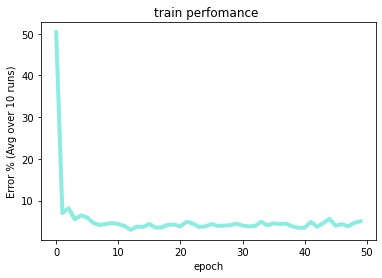

In [16]:


plt.title("train perfomance ")
plt.plot(list_epoch_train,  alpha=0.6, linewidth=4, color='turquoise')

plt.ylabel("Error % (Avg over 10 runs)")
plt.xlabel("epoch")

plt.show()

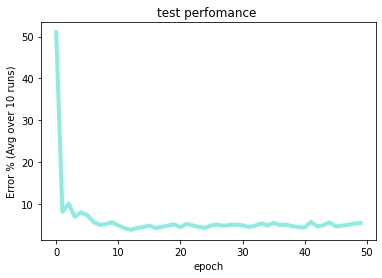

In [17]:

plt.title("test perfomance ")
plt.plot(list_epoch_test,  alpha=0.6, linewidth=4, color='turquoise')

plt.ylabel("Error % (Avg over 10 runs)")
plt.xlabel("epoch")

plt.show()